In [88]:
import pandas as pd
import numpy as np
df = pd.read_csv('DC_DataCollected.csv') 
df

,AX,AY,AZ,GPS_Lat,GPS_Long,GX,GY,GZ
0,-0.117845,0.011585,-0.144077,33.836805,-84.311771,-0.200935,-0.086819,-0.090015
1,-0.828836,4.831081,8.623124,33.836805,-84.311771,-0.567130,4.400494,8.817757
2,0.101733,-0.005060,-0.135821,33.836805,-84.311771,0.832429,4.589138,8.571621
3,-0.426638,-0.679106,-0.366451,33.836805,-84.311771,-0.219186,0.176667,0.112587
4,0.792556,4.009252,-0.176701,33.836805,-84.311771,-20.466370,-10.375417,-2.564360
...,...,...,...,...,...,...,...,...
6719,0.043143,-0.086686,-0.031558,33.755095,-84.387769,-0.215593,-2.378710,9.350751
6720,0.047804,-0.097738,0.492684,33.755095,-84.387769,-0.443762,-2.336789,9.480705
6721,-0.082691,-0.002929,-0.235823,33.755095,-84.387769,0.016768,3.289591,9.380095
6722,-0.032757,0.064049,0.066978,33.755110,-84.387790,0.029943,2.900326,9.157914


In [89]:
# Define your thresholds
# Adjust these based on your data analysis
threshold_ax, threshold_ay, threshold_az = 0.50, 0.32, 0.0  # Accelerometer thresholds (around 2.0 g)
threshold_gx, threshold_gy, threshold_gz = 0.1, 0.1, 2.1  # Gyroscope thresholds (degrees per second)

# Function to determine if a fall occurred
def detect_fall(row):
    if (abs(row['AX']) < threshold_ax and
        abs(row['AY']) < threshold_ay): 
        # abs(row['AZ']) > threshold_az): 
        # abs(row['GX']) < threshold_gx and
        # abs(row['GY']) < threshold_gy and
        # abs(row['GZ']) < threshold_gz):
        return 1
    else:
        return 0

# Apply the function to each row
df['Fall_Detected'] = df.apply(detect_fall, axis=1)

# Save the labeled data to a new CSV file
labeled_file_path = 'labeled_data.csv'  # Update with your desired output file path
df.to_csv(labeled_file_path, index=False)

print("Data labeling completed and saved to", labeled_file_path)

Data labeling completed and saved to labeled_data.csv


In [90]:
df_labelleddate = pd.read_csv('labeled_data.csv')
df_labelleddate

,AX,AY,AZ,GPS_Lat,GPS_Long,GX,GY,GZ,Fall_Detected
0,-0.117845,0.011585,-0.144077,33.836805,-84.311771,-0.200935,-0.086819,-0.090015,1
1,-0.828836,4.831081,8.623124,33.836805,-84.311771,-0.567130,4.400494,8.817757,0
2,0.101733,-0.005060,-0.135821,33.836805,-84.311771,0.832429,4.589138,8.571621,1
3,-0.426638,-0.679106,-0.366451,33.836805,-84.311771,-0.219186,0.176667,0.112587,0
4,0.792556,4.009252,-0.176701,33.836805,-84.311771,-20.466370,-10.375417,-2.564360,0
...,...,...,...,...,...,...,...,...,...
6719,0.043143,-0.086686,-0.031558,33.755095,-84.387769,-0.215593,-2.378710,9.350751,1
6720,0.047804,-0.097738,0.492684,33.755095,-84.387769,-0.443762,-2.336789,9.480705,1
6721,-0.082691,-0.002929,-0.235823,33.755095,-84.387769,0.016768,3.289591,9.380095,1
6722,-0.032757,0.064049,0.066978,33.755110,-84.387790,0.029943,2.900326,9.157914,1


In [91]:
df_labelleddate['Fall_Detected'].value_counts()

Fall_Detected
0    3640
1    3084
Name: count, dtype: int64

# EDA

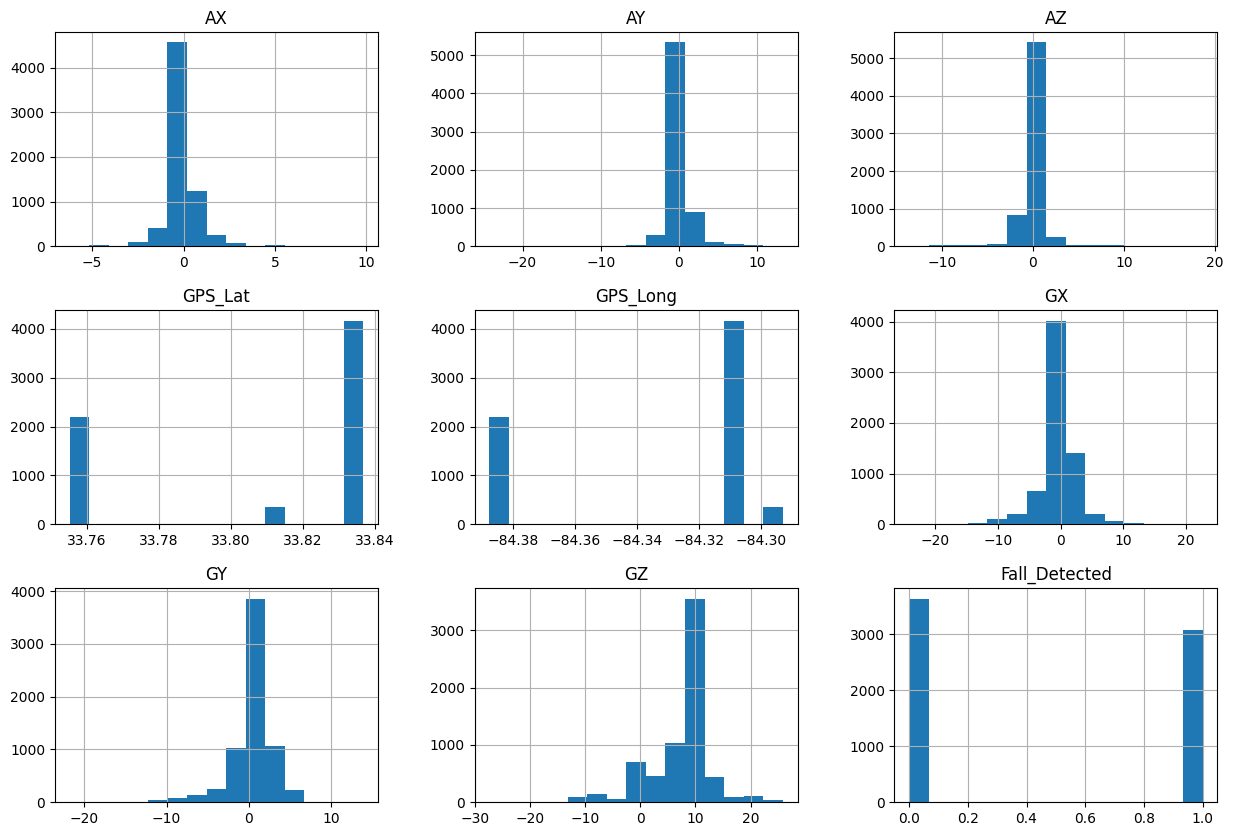

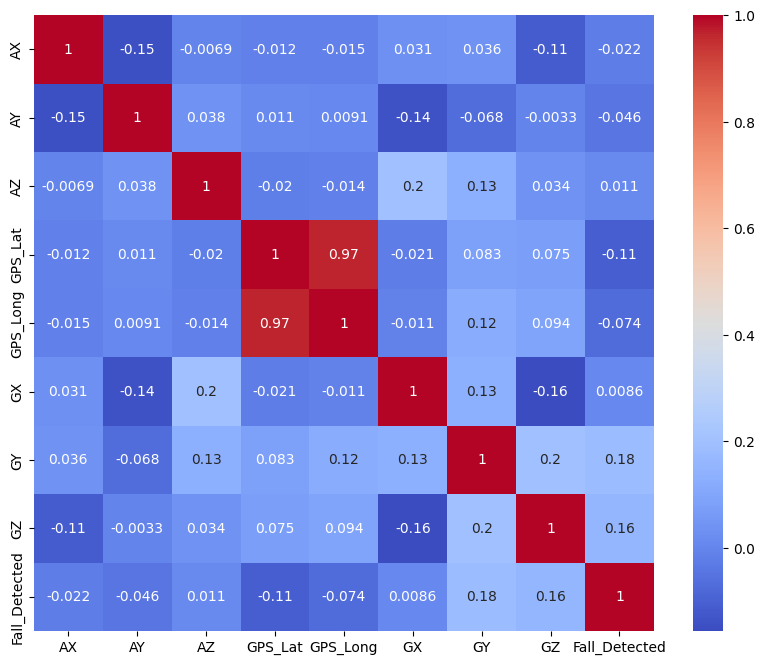

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of features
df_labelleddate.hist(bins=15, figsize=(15, 10))
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_labelleddate.corr(), annot=True, cmap='coolwarm')
plt.show()


# Building Models

In [93]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define features and target
# features = ['AX', 'AY', 'AZ', 'GX', 'GY', 'GZ']
features = ['AX', 'AY']

X = df_labelleddate[features]
y = df_labelleddate['Fall_Detected']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

class_weights = {
    0: 6724 / 3640,  # Weight for class 0
    1: 6724 / 3084   # Weight for class 1
}


# Random Forest

In [94]:
# Initialize the model with class weights
rf_model = RandomForestClassifier(random_state=42, class_weight=class_weights)

# Train the model
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
print("Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

import joblib

# Save the Random Forest Model
joblib.dump(rf_model, 'random_forest_model.pkl')



Random Forest:
[[1085    0]
 [   0  933]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1085
           1       1.00      1.00      1.00       933

    accuracy                           1.00      2018
   macro avg       1.00      1.00      1.00      2018
weighted avg       1.00      1.00      1.00      2018



['random_forest_model.pkl']

# Logistic Regression

In [95]:
# Initialize the Logistic Regression model with class weights
logreg_model = LogisticRegression(random_state=42, class_weight=class_weights)

# Train the model
logreg_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_logreg = logreg_model.predict(X_test)
print("Logistic Regression:")
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

# Save the Logistics Regression Model
joblib.dump(logreg_model, 'logreg_model.pkl')


Logistic Regression:
[[587 498]
 [630 303]]
              precision    recall  f1-score   support

           0       0.48      0.54      0.51      1085
           1       0.38      0.32      0.35       933

    accuracy                           0.44      2018
   macro avg       0.43      0.43      0.43      2018
weighted avg       0.43      0.44      0.44      2018



['logreg_model.pkl']

# Support Vector Machine

In [96]:
# Support Vector Machine
# Initialize the Support Vector Classifier with class weights
svm_model = SVC(random_state=42, class_weight=class_weights)

# Hyperparameters to tune
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Grid search
svm_grid = GridSearchCV(svm_model, svm_params, cv=3, scoring='accuracy')
svm_grid.fit(X_train, y_train)

# Best model
best_svm = svm_grid.best_estimator_

# Predict and evaluate
y_pred_svm = best_svm.predict(X_test)
print("Support Vector Machine:")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# Save the SVM Model
joblib.dump(best_svm, 'best_svm_model.pkl')


Support Vector Machine:
[[1069   16]
 [  14  919]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1085
           1       0.98      0.98      0.98       933

    accuracy                           0.99      2018
   macro avg       0.98      0.99      0.99      2018
weighted avg       0.99      0.99      0.99      2018



['best_svm_model.pkl']

# Gradient Boosting

In [97]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the Gradient Boosting Classifier with potential parameters to prevent overfitting
gb_model = GradientBoostingClassifier(random_state=42)

# Hyperparameters to tune
gb_params = {
    'n_estimators': [50, 100],  # Reduced number of estimators
    'learning_rate': [0.01, 0.1],
    'max_depth': [3],  # Limiting depth of trees
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]  # Minimum samples required at a leaf node
}

# Grid search with cross-validation
gb_grid = GridSearchCV(gb_model, gb_params, cv=3, scoring='accuracy')
gb_grid.fit(X_train, y_train)

# Best model
best_gb = gb_grid.best_estimator_

# Predict and evaluate on the test set
y_pred_gb = best_gb.predict(X_test)
print("Adjusted Gradient Boosting Classifier:")
print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

# Save the Gradient Boosting Model
joblib.dump(best_gb, 'best_gb_model.pkl')


Adjusted Gradient Boosting Classifier:
[[1085    0]
 [   0  933]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1085
           1       1.00      1.00      1.00       933

    accuracy                           1.00      2018
   macro avg       1.00      1.00      1.00      2018
weighted avg       1.00      1.00      1.00      2018



['best_gb_model.pkl']

# Logistic Regression with SMOTE

In [98]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline

# Feature scaling
scaler = StandardScaler()

# Oversampling using SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Pipeline for scaling and logistic regression
logreg_pipeline = make_pipeline(scaler, LogisticRegression(random_state=42, class_weight=class_weights))

# Hyperparameters to tune
logreg_params = {'logisticregression__C': [0.01, 0.1, 1, 10, 100], 
                'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear']}

# Grid search
logreg_grid = GridSearchCV(logreg_pipeline, logreg_params, cv=3, scoring='accuracy')
logreg_grid.fit(X_train_smote, y_train_smote)

# Best model
best_logreg = logreg_grid.best_estimator_

# Predict and evaluate
y_pred_logreg = best_logreg.predict(X_test)
print("Improved Logistic Regression:")
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

# Save the Log Reg with Smote Boosting Model
joblib.dump(best_logreg, 'logreg_smote_model.pkl')


Improved Logistic Regression:
[[ 97 988]
 [  0 933]]
              precision    recall  f1-score   support

           0       1.00      0.09      0.16      1085
           1       0.49      1.00      0.65       933

    accuracy                           0.51      2018
   macro avg       0.74      0.54      0.41      2018
weighted avg       0.76      0.51      0.39      2018



['logreg_smote_model.pkl']